In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
import pickle

## 0. Pickle을 사용한 데이터 저장

In [3]:
path = "./"
a = [gauss(1.5, 2) for i in range(1000000)]

In [4]:
pkl_file = open(path+'data.pkl', 'wb') # write binary pkl file
%time pickle.dump(a, pkl_file)
pkl_file
pkl_file.close()

CPU times: user 28.5 ms, sys: 12.5 ms, total: 41 ms
Wall time: 41.5 ms


In [5]:
pkl_file = open(path+'data.pkl', 'rb') # read binary pkl file
%time b = pickle.load(pkl_file)
print(b[:5])
print(a[:5])

CPU times: user 49 ms, sys: 25.4 ms, total: 74.4 ms
Wall time: 76.5 ms
[2.9362707715576803, 0.9046084057708803, 3.844781185819631, 2.5218437087934076, 3.2867272153008926]
[2.9362707715576803, 0.9046084057708803, 3.844781185819631, 2.5218437087934076, 3.2867272153008926]


In [6]:
# is 'a' and 'b' identical 
print(np.allclose(np.array(a), np.array(b)))
print(np.sum(np.array(a) - np.array(b)))

True
0.0


## 1. 아래는 두 객체를 사전을 사용하여 Pickle에 저장하기 (한번에 쓰고 한번에 읽을수 밖에..)

In [7]:
x = np.array(a)
y = np.array(a) ** 2
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x':x, 'y':y}, pkl_file)
pkl_file.close()

In [9]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()

In [10]:
for key in data.keys():
    print(key, data[key][:4])

x [2.93627077 0.90460841 3.84478119 2.52184371]
y [ 8.62168604  0.81831637 14.78234237  6.35969569]


## 2. 텍스트 파일 읽고 쓰기 : CSV 파일

In [16]:
rows = 5000
a = np.random.standard_normal((rows, 5))
#a.round(4)
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [23]:
csv_file = open(path + 'data.csv', 'w')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = "%s,%f,%f,%f,%f,%f\n" % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [25]:
csv_file = open(path + 'data.csv', 'r')
for i in range(5):
    print(csv_file.readline())
csv_file.close()

date,no1,no2,no3,no4,no5

2014-01-01 00:00:00,-1.246015,-0.325238,-0.384401,1.460656,-0.309106

2014-01-01 01:00:00,0.054955,-0.773023,0.718089,-0.790447,-0.905534

2014-01-01 02:00:00,0.579016,-0.061407,0.845296,0.097836,-0.291162

2014-01-01 03:00:00,0.563562,0.837378,-1.334732,0.054331,-1.117778



## 3.  SQL 데이터베이스

In [33]:
import sqlite3 as sq3
import datetime as dt

In [29]:
query = 'CREATE TABLE numbs (Date data, No1 real, No2 real)'

In [30]:
con = sq3.connect(path + 'IOput_numbs.db')

In [31]:
con.execute(query)

In [32]:
con.commit() #실제로 실행 하려면 commit이 필요함

In [34]:
con.execute('INSERT INTO numbs VALUES(?,?,?)', (dt.datetime.now(), 0.12, 7.3))

In [35]:
con.commit()

In [36]:
data = np.random.standard_normal((10000,2)).round(5)
for row in data:
    con.execute('INSERT INTO numbs VALUES(?,?,?)',
               (dt.datetime.now(), row[0], row[1]))
con.commit()

In [37]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2020-01-03 18:31:21.277075', 0.12, 7.3),
 ('2020-01-03 18:33:31.515436', -0.71459, 0.92834),
 ('2020-01-03 18:33:31.516124', -0.02389, 0.25624),
 ('2020-01-03 18:33:31.516279', -0.47793, -0.95737),
 ('2020-01-03 18:33:31.516306', -0.34385, 0.04749),
 ('2020-01-03 18:33:31.516324', 0.22272, 0.07727),
 ('2020-01-03 18:33:31.516339', -1.16254, 1.15109),
 ('2020-01-03 18:33:31.516353', -0.81575, 1.06506),
 ('2020-01-03 18:33:31.516367', -0.65785, 0.01974),
 ('2020-01-03 18:33:31.516380', -1.29749, -0.60319)]

In [39]:
pointer = con.execute('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())

('2020-01-03 18:31:21.277075', 0.12, 7.3)
('2020-01-03 18:33:31.515436', -0.71459, 0.92834)
('2020-01-03 18:33:31.516124', -0.02389, 0.25624)


In [40]:
con.close()

## 4. Numpy 배열 읽고 쓰기

In [42]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00', dtype='datetime64[m]') # minute intervals
len(dtimes)

3681360

In [44]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [47]:
data['Date'] = dtimes
data

array([('2015-01-01T10:00', 0., 0.), ('2015-01-01T10:01', 0., 0.),
       ('2015-01-01T10:02', 0., 0.), ..., ('2021-12-31T21:57', 0., 0.),
       ('2021-12-31T21:58', 0., 0.), ('2021-12-31T21:59', 0., 0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [48]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:,0]
data['No2'] = a[:,1]

In [50]:
data[:3]

array([('2015-01-01T10:00', -0.53974, -0.5712 ),
       ('2015-01-01T10:01',  0.28183, -0.27307),
       ('2015-01-01T10:02', -0.48885,  1.17871)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [53]:
%time np.save(path + 'NP_Array', data)

CPU times: user 6.6 ms, sys: 93.4 ms, total: 100 ms
Wall time: 142 ms


In [55]:
%time np.load(path + 'NP_Array.npy')

CPU times: user 1.79 ms, sys: 42.5 ms, total: 44.3 ms
Wall time: 43 ms


array([('2015-01-01T10:00', -0.53974, -0.5712 ),
       ('2015-01-01T10:01',  0.28183, -0.27307),
       ('2015-01-01T10:02', -0.48885,  1.17871), ...,
       ('2021-12-31T21:57',  0.96369, -0.77926),
       ('2021-12-31T21:58',  2.27273, -0.03988),
       ('2021-12-31T21:59', -0.16416, -1.20291)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [59]:
data = np.random.standard_normal((10000, 6000))
%time np.save(path + 'BigNP_array', data)
!du -sh BigNP_array.npy

CPU times: user 38.1 ms, sys: 713 ms, total: 751 ms
Wall time: 1 s
464M	BigNP_array.npy


In [61]:
%time np.load(path + 'BigNP_array.npy')

CPU times: user 1.76 ms, sys: 276 ms, total: 277 ms
Wall time: 277 ms


array([[-3.03671408, -0.363669  , -0.23972489, ..., -0.15185119,
        -1.10513757,  0.35138406],
       [-2.16393364,  0.90288389,  0.04067641, ..., -1.41192887,
         0.46878776,  0.07505491],
       [ 0.45609797,  2.30721893,  1.36729575, ..., -1.04595473,
        -0.83468938,  0.64417033],
       ...,
       [-0.56516238, -0.69139454,  1.34458366, ..., -0.04548785,
         2.47612016,  0.51606565],
       [ 1.74588676,  0.42006134, -0.49714472, ..., -0.74552976,
        -0.47359368, -0.56469387],
       [ 0.44285697, -0.24254047, -0.5226724 , ..., -0.92145726,
         0.04534459,  0.13066963]])

In [62]:
data = 0.0

## 5. Pandas를 사용한 입출력

In [65]:
import sqlite3 as sq3
data = np.random.standard_normal((1000000, 5)).round(5)
filename = path + 'numbs'

In [66]:
query = "CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)"
con = sq3.Connection(filename + '.db')
con.execute(query)

In [76]:
%%time 
con.executemany('INSERT INTO numbers VALUES(?,?,?,?,?)', data) ## 오래 걸림 
con.commit()

CPU times: user 8.28 s, sys: 149 ms, total: 8.43 s
Wall time: 8.67 s


In [77]:
%%time 
temp = con.execute('SELECT * FROM numbers').fetchall() ## 조금 더 빠름
print(temp[:2])
temp = 0.0

[(-0.18264, -0.10623, 0.37005, 0.87445, -0.08811), (0.39778, -0.55083, -0.41952, 0.31989, 0.57376)]
CPU times: user 4.65 s, sys: 403 ms, total: 5.05 s
Wall time: 5.06 s


In [83]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0' ## 더 빠름
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 1.8 s, sys: 163 ms, total: 1.96 s
Wall time: 1.94 s


In [84]:
print(res.shape)
res = res[::100]
res.shape

(749046, 5)


(7491, 5)

(-4.5, 0.5)

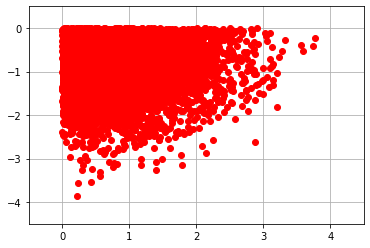

In [86]:
%matplotlib inline
plt.plot(res[:,0], res[:,1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)

### 5.1 SQL 에서 pandas로

In [87]:
import pandas.io.sql as pds

In [88]:
%time data = pds.read_sql('SELECT * FROM numbers', con) ## 병목은 SQL 데이터베이스 이다. 하지만 메모리에 들여 놓기만 하면,
#나머지는 pandas로 더 빠르게 처리 가능!

CPU times: user 6.01 s, sys: 604 ms, total: 6.61 s
Wall time: 8.84 s


In [89]:
data.head()

,No1,No2,No3,No4,No5
0,-0.18264,-0.10623,0.37005,0.87445,-0.08811
1,0.39778,-0.55083,-0.41952,0.31989,0.57376
2,1.26532,-0.29741,0.37900,1.66138,0.76539
3,0.03900,-0.79910,-2.03717,0.63110,0.10831
4,-0.26255,0.94639,0.53269,-1.18108,0.06696


In [90]:
%time data[(data['No1']>0) & (data['No2']<0)].head() # data는 이미 메모리 상에 존재하고, 훨씬 더 빠르게 분석가능

CPU times: user 105 ms, sys: 34 ms, total: 139 ms
Wall time: 103 ms


,No1,No2,No3,No4,No5
1,0.39778,-0.55083,-0.41952,0.31989,0.57376
2,1.26532,-0.29741,0.37900,1.66138,0.76539
3,0.03900,-0.79910,-2.03717,0.63110,0.10831
6,0.89597,-1.08950,1.06647,0.41235,-0.49359
12,1.18064,-0.92482,-1.12472,-1.27248,1.30871


(-5.251043, 5.083523, -5.710182499999999, 5.0577725)

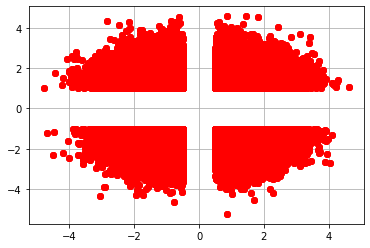

In [92]:
res = data[['No1','No2']][((data['No1']>0.5) | (data['No1']<-0.5)) & ((data['No2']<-1) | (data['No2']>1))]
plt.plot(res.No1, res['No2'], 'ro')
plt.grid(True); plt.axis('tight')

**Pandas를 PyTables와 결합하면 입출력 속도를 더 개선할 수 있다!**

In [93]:
h5s = pd.HDFStore(filename + '.h5s', 'w') # write PyTables
%time h5s['data'] = data

CPU times: user 105 ms, sys: 164 ms, total: 270 ms
Wall time: 343 ms


In [94]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./numbs.h5s

In [95]:
h5s.close()

In [96]:
%%time
h5s = pd.HDFStore(filename + '.h5s','r') # read in PyTables
temp = h5s['data']
h5s.close()

CPU times: user 13.9 ms, sys: 46.5 ms, total: 60.4 ms
Wall time: 63.6 ms


In [97]:
np.allclose(np.array(temp), np.array(data))

True

In [99]:
temp = 0.0

In [102]:
!du -sh numbs* ## Pytables이 저장 공간도 더 적게 차지 함!

160M	numbs.db
137M	numbs.h5s


### 5.2 CSV 파일 저장

In [104]:
%time data.to_csv(filename + '.csv')

CPU times: user 20.7 s, sys: 394 ms, total: 21.1 s
Wall time: 21.3 s


CPU times: user 2.38 s, sys: 317 ms, total: 2.7 s
Wall time: 2.17 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1211dfe50>,
      dtype=object)

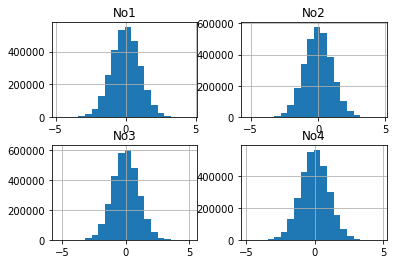

In [106]:
%%time 
pd.read_csv(filename + '.csv')[['No1','No2','No3','No4']].hist(bins=20, grid=True)

### 5.3 엑셀 파일 저장

In [113]:
%time data[:100000].to_excel(filename + '.xlsx', index=False) ## 상당히 오래 걸림..

CPU times: user 8.48 s, sys: 169 ms, total: 8.65 s
Wall time: 8.89 s


CPU times: user 6.29 s, sys: 55.4 ms, total: 6.35 s
Wall time: 6.33 s


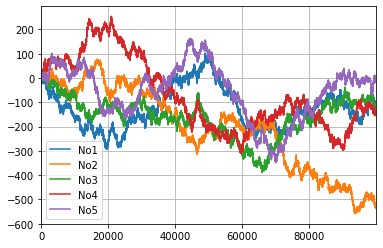

In [117]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot(grid=True)

In [119]:
!du -sh numbs.* # h5s가 젤 이상적

144M	numbs.csv
160M	numbs.db
137M	numbs.h5s
4.0M	numbs.xlsx


<br><br>
## 6. PyTables를 이용한 고속 입축력

In [2]:
import numpy as np
import tables as tb ## crucial
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "./"
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')

In [4]:
rows = 2000000 # 2M
row_des = {
    'Date' : tb.StringCol(26, pos=1),
    'No1'  : tb.IntCol(pos=2),
    'No2'  : tb.IntCol(pos=3),
    'No3'  : tb.Float64Col(pos=4),
    'No4'  : tb.Float64Col(pos=5)
}

In [5]:
filters = tb.Filters(complevel=0) # 압축하지 않는다
tab = h5.create_table('/', 'ints_floats', row_des,
                     title='Integers and Floats', expectedrows = rows, filters=filters)
tab

/ints_floats_2 (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [6]:
pointer = tab.row

In [7]:
ran_int = np.random.randint(0, 10000, size=(rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(5)

In [8]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append() # 자료를 추가한 뒤 포인터를 한 행 뒤로 옮긴다
tab.flush()  ## 자료를 넣은뒤엔 항상 flush() 해야 함

CPU times: user 8.83 s, sys: 117 ms, total: 8.95 s
Wall time: 9.31 s


In [9]:
tab

/ints_floats_2 (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [10]:
!du -sh * ## tab.h5 

464M	BigNP_array.npy
512K	IOput_numbs.db
116K	Input_Output.ipynb
356K	MatplotlibTest.ipynb
 57M	NP_Array.npy
524K	TimeSeries.ipynb
1.7M	data
388K	data.csv
 15M	data.pkl
144M	numbs.csv
160M	numbs.db
137M	numbs.h5s
4.0M	numbs.xlsx
144M	numbscsv
 96M	tab.h5


<br><br>
**아래는 넘파이를 이용해서 만드는 방법**

In [11]:
filters = tb.Filters(complevel=0) # 압축하지 않는다
dty = np.dtype([('Date','S26'), ('No1','<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)
sarray

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), ...,
       (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [12]:
%%time 
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:,0]
sarray['No2'] = ran_int[:,1]
sarray['No3'] = ran_flo[:,0]
sarray['No4'] = ran_flo[:,1]

CPU times: user 155 ms, sys: 33.7 ms, total: 189 ms
Wall time: 194 ms


In [13]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray, title="Integers and Floats", 
               expectedrows=rows, filters=filters) ## 위 방법보다 훨씬 빠름

CPU times: user 46.2 ms, sys: 66.8 ms, total: 113 ms
Wall time: 208 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [14]:
h5

File(filename=./tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats_2 (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [15]:
h5.remove_node('/', 'ints_floats_from_array') # 중복된 테이블 삭제

In [24]:
tab

/ints_floats_2 (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [25]:
type(tab)

tables.table.Table

In [20]:
tab[:3]

array([(b'2020-01-03 23:30:40.793893', 7164, 1405, -1.14589, -0.15926),
       (b'2020-01-03 23:30:40.793949', 3538, 1558, -2.01835, -1.07253),
       (b'2020-01-03 23:30:40.793958', 8124, 5710, -1.19759, -1.27397)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [23]:
tab[:4]['No4']

array([-0.15926, -1.07253, -1.27397,  0.04428])

In [26]:
%time np.sum(tab[:]['No3'])

CPU times: user 58.9 ms, sys: 74.4 ms, total: 133 ms
Wall time: 139 ms


-808.0610300000003

In [27]:
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: user 82.7 ms, sys: 40.6 ms, total: 123 ms
Wall time: 132 ms


133292238.35656783

2000000
CPU times: user 185 ms, sys: 65.7 ms, total: 251 ms
Wall time: 255 ms


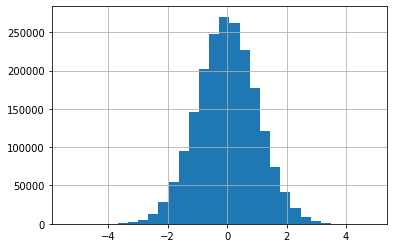

In [28]:
%%time
plt.hist(tab[:]["No3"], bins=30)
plt.grid(True)
print(len(tab[:]["No3"]))

<br><br>
**압축된 테이블 다루기**<br>
: PyTables의 장점은 압축을 사용한다는 것이다. 압축을 통하여 디스크 공간을 절약할 뿐 아니라, 동시에 입출력 연산 성능도 개선할 수 있다.

In [29]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w')

In [31]:
filters = tb.Filters(complevel=4, complib='blosc')

In [33]:
tabc = h5c.create_table('/', 'ints_floats', sarray, 
                       title="Integers and Floats", expectedrows=rows, filters=filters)

In [38]:
h5c.close()

<br><br><br>
### 배열 다루기

In [36]:
%%time 
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

CPU times: user 2.36 ms, sys: 32.8 ms, total: 35.1 ms
Wall time: 51 ms


In [37]:
h5

File(filename=./tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats_2 (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [39]:
h5.close()

<br><br><br>
### Out-of-memory 연산<br>
:PyTables는 메모리보다 큰 배열의 연산을 구현 가능하게 해주는 out-of-memory 연산을 지원한다

In [40]:
filename = path + "array.h5"
h5 = tb.open_file(filename, 'w')

In [46]:
n = 1000
ear = h5.create_earray(h5.root, 'ear2',
                     atom=tb.Float64Atom(),
                     shape=(0,n))

In [52]:
%%time 
rand = np.random.standard_normal((n,n))
for i in range(750):
    ear.append(rand)
ear.flush()

CPU times: user 2.41 s, sys: 10.1 s, total: 12.5 s
Wall time: 33.5 s


In [53]:
ear

/ear2 (EArray(1344000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [54]:
ear.size_on_disk

10752000000

In [55]:
## out-of-memory 계산 결과를 저장할 또 다른 earray 객체를 데이터베이스에 생성한다
out = h5.create_earray(h5.root, 'out', atom=tb.Float64Atom(), shape=(0,n))

In [57]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))') # 수치 표현식을 문자열로 입력
expr.set_output(out, append_mode=True) # 결과를 저장할 디스크 기반의 배열 설정
%time expr.eval() # 수치 표현식을 실제로 계산하여 디스크 기반의 배열에 저장

CPU times: user 26 s, sys: 13.6 s, total: 39.5 s
Wall time: 2min 17s


/out (EArray(1344000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [58]:
%time imarray = ear.read() #전체 배열을 메모리에 읽어 들인다

CPU times: user 6.96 s, sys: 14.6 s, total: 21.6 s
Wall time: 51.7 s


In [59]:
import numexpr as ne
expr = '3 * sum(imarray) + sqrt(abs(imarray))'

In [62]:
#np.set_num_threads(16)
#%time ne.evaluate(expr)[0,:10]

RuntimeError: invalid program: reduction operations must occur last

In [61]:
h5.close()